In [178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
train_rice=pd.read_csv("./datasets/train_rice.csv",encoding = 'gb18030')
train_rice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 7 columns):
区县id       81 non-null object
2015年早稻    81 non-null float64
2016年早稻    81 non-null float64
2017年早稻    81 non-null float64
2015年晚稻    81 non-null float64
2016年晚稻    81 non-null float64
2017年晚稻    81 non-null float64
dtypes: float64(6), object(1)
memory usage: 4.5+ KB


In [3]:
train_rice.head()

,区县id,2015年早稻,2016年早稻,2017年早稻,2015年晚稻,2016年晚稻,2017年晚稻
0,county1,15.812589,15.878158,15.835681,15.754182,15.740001,15.636155
1,county2,16.658008,16.623931,16.555916,16.666867,16.686079,16.583385
2,county3,15.206326,15.085393,15.049788,15.177311,14.995996,14.889857
3,county4,15.352061,15.311764,15.236604,15.020413,15.005488,14.882306
4,county5,15.942749,15.943796,15.876010,16.019721,15.989249,15.905980


In [4]:
train_rice.describe()

,2015年早稻,2016年早稻,2017年早稻,2015年晚稻,2016年晚稻,2017年晚稻
count,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000
mean,14.816367,14.820058,14.742249,14.625739,14.567032,14.440890
std,2.052913,1.996540,1.993349,2.131875,2.181149,2.289394
min,7.106327,7.274634,7.334944,6.273329,6.102448,6.000676
25%,13.922150,13.789245,13.735271,13.664202,13.578547,13.497148
50%,15.266256,15.186619,15.120885,15.119498,15.005488,14.949659
75%,15.991356,16.032551,15.923424,15.941951,15.955306,15.869497
max,17.877005,17.930435,17.865782,17.929965,17.983606,17.906118


In [76]:
train_rice[train_rice['区县id']=='county58']

,区县id,2015年早稻,2016年早稻,2017年早稻,2015年晚稻,2016年晚稻,2017年晚稻
54,county58,10.648088,10.93666,10.865277,11.578052,11.39838,11.305982


In [5]:
train_rice['区县id'].value_counts()

county54    1
county66    1
county83    1
county15    1
county18    1
county44    1
county20    1
county7     1
county75    1
county43    1
county21    1
county82    1
county72    1
county71    1
county30    1
county47    1
county73    1
county79    1
county32    1
county23    1
county80    1
county65    1
county37    1
county36    1
county56    1
county77    1
county5     1
county49    1
county16    1
county10    1
           ..
county52    1
county38    1
county45    1
county63    1
county29    1
county4     1
county60    1
county27    1
county39    1
county55    1
county88    1
county26    1
county64    1
county87    1
county13    1
county41    1
county67    1
county53    1
county12    1
county9     1
county62    1
county74    1
county76    1
county51    1
county50    1
county31    1
county40    1
county42    1
county11    1
county22    1
Name: 区县id, Length: 81, dtype: int64

In [6]:
train_weather=pd.read_csv('datasets/train_weather.csv',encoding='gbk')
train_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132951 entries, 0 to 132950
Data columns (total 17 columns):
区县id             132951 non-null object
站名id             132951 non-null int64
年份               132951 non-null int64
月份               132951 non-null int64
日期               132951 non-null int64
日照时数（单位：h)       132951 non-null object
02时风向            132951 non-null object
08时风向            132951 non-null object
14时风向            132951 non-null object
20时风向            132951 non-null object
日平均风速(单位：m/s)    132951 non-null object
日降水量（mm）         132951 non-null object
日最高温度（单位：℃）      132951 non-null float64
日最低温度（单位：℃）      132951 non-null float64
日平均温度（单位：℃）      132951 non-null object
日相对湿度（单位：%）      132951 non-null object
日平均气压（单位：hPa）    132951 non-null object
dtypes: float64(2), int64(4), object(11)
memory usage: 17.2+ MB


c:\programdata\anaconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (5,10,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
train_weather.head()

,区县id,站名id,年份,月份,日期,日照时数（单位：h),02时风向,08时风向,14时风向,20时风向,日平均风速(单位：m/s),日降水量（mm）,日最高温度（单位：℃）,日最低温度（单位：℃）,日平均温度（单位：℃）,日相对湿度（单位：%）,日平均气压（单位：hPa）
0,county25,1,2015,1,1,6.3,NNW,N,NNE,S,1.8,0,14.1,7.2,9.1,43,980.6
1,county25,1,2015,1,2,8.1,SSE,S,SSW,S,1.3,0,18.3,1.6,7.5,64,977.7
2,county25,1,2015,1,3,4.3,S,SSE,S,SSE,2,0,18.9,2.4,9.4,66,973.1
3,county25,1,2015,1,4,0,WNW,SSW,S,SSE,2.2,0.3,14.9,9.0,11.5,76,966.7
4,county25,1,2015,1,5,0,SSE,S,SSW,C,2.8,0.8,16.8,11.6,15.5,91,963.9


In [8]:
train_weather.describe()

,站名id,年份,月份,日期,日最高温度（单位：℃）,日最低温度（单位：℃）
count,132951.000000,132951.000000,132951.000000,132951.000000,132951.000000,132951.000000
mean,1.032967,2016.499658,6.522930,15.729637,25.785234,18.326228
std,0.178551,1.117732,3.448716,8.800125,7.458326,6.529348
min,1.000000,2015.000000,1.000000,1.000000,-1.500000,-5.500000
25%,1.000000,2016.000000,4.000000,8.000000,20.500000,13.200000
50%,1.000000,2016.000000,7.000000,16.000000,27.400000,19.800000
75%,1.000000,2017.000000,10.000000,23.000000,31.900000,24.000000
max,2.000000,2018.000000,12.000000,31.000000,41.600000,30.700000


In [9]:
train_weather['区县id'].value_counts()

county1     2922
county8     2922
county34    2922
county20    1461
county84    1461
county38    1461
county11    1461
county24    1461
county27    1461
county73    1461
county10    1461
county15    1461
county40    1461
county33    1461
county45    1461
county70    1461
county48    1461
county68    1461
county35    1461
county85    1461
county62    1461
county66    1461
county31    1461
county61    1461
county77    1461
county23    1461
county81    1461
county18    1461
county36    1461
county56    1461
            ... 
county75    1461
county53    1461
county42    1461
county39    1461
county7     1461
county87    1461
county28    1461
county86    1461
county88    1461
county78    1461
county13    1461
county6     1461
county9     1461
county5     1461
county37    1461
county57    1461
county43    1461
county14    1461
county80    1461
county50    1461
county59    1461
county25    1461
county19    1461
county32    1461
county12    1461
county64    1461
county79    1461
county47    14

In [119]:
testA=pd.read_csv('datasets/testA.csv',names=['xq'],encoding='gbk')
testA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 1 columns):
xq    81 non-null object
dtypes: object(1)
memory usage: 728.0+ bytes


In [120]:
testA.head()

,xq
0,county1
1,county2
2,county3
3,county4
4,county5


In [11]:
testA['county1'].value_counts()

county54    1
county3     1
county83    1
county15    1
county18    1
county44    1
county20    1
county7     1
county75    1
county43    1
county21    1
county82    1
county71    1
county30    1
county47    1
county73    1
county79    1
county32    1
county2     1
county23    1
county80    1
county65    1
county37    1
county36    1
county56    1
county77    1
county5     1
county49    1
county16    1
county10    1
           ..
county38    1
county72    1
county45    1
county63    1
county29    1
county4     1
county60    1
county27    1
county39    1
county34    1
county88    1
county87    1
county62    1
county55    1
county41    1
county67    1
county53    1
county12    1
county9     1
county64    1
county76    1
county26    1
county51    1
county50    1
county31    1
county40    1
county42    1
county11    1
county74    1
county22    1
Name: county1, Length: 80, dtype: int64

将日降水量中*和/替换为临近7天的均值

In [ ]:
index_unknown=train_weather[[x in ['*','/'] for x in list(train_weather['日降水量（mm）'])]].index
for index in index_unknown:
    train_weather.loc[index,'日降水量（mm）']=train_weather[index-4:index+3]['日降水量（mm）'][train_weather['日降水量（mm）']!='*'][train_weather['日降水量（mm）']!='/'].astype(float).mean()

将日照时数中/替换为临近7天的均值

In [ ]:
index_unknown=train_weather[train_weather['日照时数（单位：h)']=='/'].index
for index in index_unknown:
    train_weather.loc[index,'日照时数（单位：h)']=train_weather[index-4:index+3]['日照时数（单位：h)'][train_weather['日照时数（单位：h)']!='/'].astype(float).mean()

将日平均风速(单位：m/s)中/替换为临近7天的均值

In [ ]:
index_unknown=train_weather[train_weather['日平均风速(单位：m/s)']=='/'].index
for index in index_unknown:
    train_weather.loc[index,'日平均风速(单位：m/s)']=train_weather[index-4:index+3]['日平均风速(单位：m/s)'][train_weather['日平均风速(单位：m/s)']!='/'].astype(float).mean()

将日平均温度（单位：℃）中/替换为临近7天的均值

In [ ]:
index_unknown=train_weather[train_weather['日平均温度（单位：℃）']=='/'].index
for index in index_unknown:
    train_weather.loc[index,'日平均温度（单位：℃）']=train_weather[index-4:index+3]['日平均温度（单位：℃）'][train_weather['日平均温度（单位：℃）']!='/'].astype(float).mean()

将日相对湿度（单位：%）中/替换为临近7天的均值

In [ ]:
index_unknown=train_weather[train_weather['日相对湿度（单位：%）']=='/'].index
for index in index_unknown:
    train_weather.loc[index,'日相对湿度（单位：%）']=train_weather[index-4:index+3]['日相对湿度（单位：%）'][train_weather['日相对湿度（单位：%）']!='/'].astype(float).mean()

将日平均气压（单位：hPa）中/替换为临近7天的均值

In [ ]:
index_unknown=train_weather[train_weather['日平均气压（单位：hPa）']=='/'].index
for index in index_unknown:
    train_weather.loc[index,'日平均气压（单位：hPa）']=train_weather[index-4:index+3]['日平均气压（单位：hPa）'][train_weather['日平均气压（单位：hPa）']!='/'].astype(float).mean()

In [ ]:
train_weather[train_weather['日降水量（mm）']=='*'].index

In [44]:
train_weather[train_weather['日相对湿度（单位：%）']=='/'].index

c:\programdata\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


Int64Index([], dtype='int64')

In [45]:
train_weather.to_csv('train_weather.csv')

将类型转为float

In [179]:
train_weather=pd.read_csv('train_weather.csv')
train_weather

,Unnamed: 0,Unnamed: 0.1,区县id,站名id,年份,月份,日期,日照时数（单位：h),02时风向,08时风向,14时风向,20时风向,日平均风速(单位：m/s),日降水量（mm）,日最高温度（单位：℃）,日最低温度（单位：℃）,日平均温度（单位：℃）,日相对湿度（单位：%）,日平均气压（单位：hPa）
0,0,0,county25,1,2015,1,1,6.3,NNW,N,NNE,S,1.8,0.000000,14.1,7.2,9.1,43.0,980.6
1,1,1,county25,1,2015,1,2,8.1,SSE,S,SSW,S,1.3,0.000000,18.3,1.6,7.5,64.0,977.7
2,2,2,county25,1,2015,1,3,4.3,S,SSE,S,SSE,2.0,0.000000,18.9,2.4,9.4,66.0,973.1
3,3,3,county25,1,2015,1,4,0.0,WNW,SSW,S,SSE,2.2,0.300000,14.9,9.0,11.5,76.0,966.7
4,4,4,county25,1,2015,1,5,0.0,SSE,S,SSW,C,2.8,0.800000,16.8,11.6,15.5,91.0,963.9
5,5,5,county25,1,2015,1,6,0.0,NNW,N,N,NNE,3.1,1.800000,15.5,7.0,9.4,85.0,972.0
6,6,6,county25,1,2015,1,7,0.0,N,N,NNW,N,3.3,2.200000,8.0,5.3,6.5,82.0,978.4
7,7,7,county25,1,2015,1,8,0.0,C,ESE,N,N,1.4,4.066667,9.3,4.0,6.6,80.0,981.1
8,8,8,county25,1,2015,1,9,0.0,N,NNE,N,SSE,1.6,3.500000,9.0,5.9,7.3,78.0,980.6
9,9,9,county25,1,2015,1,10,0.0,NNE,NW,N,E,1.1,15.800000,9.1,5.5,7.0,87.0,979.3


In [13]:
train_weather.loc[:,['日照时数（单位：h)','日平均风速(单位：m/s)','日降水量（mm）','日最高温度（单位：℃）','日最低温度（单位：℃）','日平均温度（单位：℃）','日相对湿度（单位：%）','日平均气压（单位：hPa）']].astype(float)

,日照时数（单位：h),日平均风速(单位：m/s),日降水量（mm）,日最高温度（单位：℃）,日最低温度（单位：℃）,日平均温度（单位：℃）,日相对湿度（单位：%）,日平均气压（单位：hPa）
0,6.3,1.8,0.000000,14.1,7.2,9.1,43.0,980.6
1,8.1,1.3,0.000000,18.3,1.6,7.5,64.0,977.7
2,4.3,2.0,0.000000,18.9,2.4,9.4,66.0,973.1
3,0.0,2.2,0.300000,14.9,9.0,11.5,76.0,966.7
4,0.0,2.8,0.800000,16.8,11.6,15.5,91.0,963.9
5,0.0,3.1,1.800000,15.5,7.0,9.4,85.0,972.0
6,0.0,3.3,2.200000,8.0,5.3,6.5,82.0,978.4
7,0.0,1.4,4.066667,9.3,4.0,6.6,80.0,981.1
8,0.0,1.6,3.500000,9.0,5.9,7.3,78.0,980.6
9,0.0,1.1,15.800000,9.1,5.5,7.0,87.0,979.3


(array([1, 2, 3, 4, 5, 6, 7]), <a list of 7 Text xticklabel objects>)

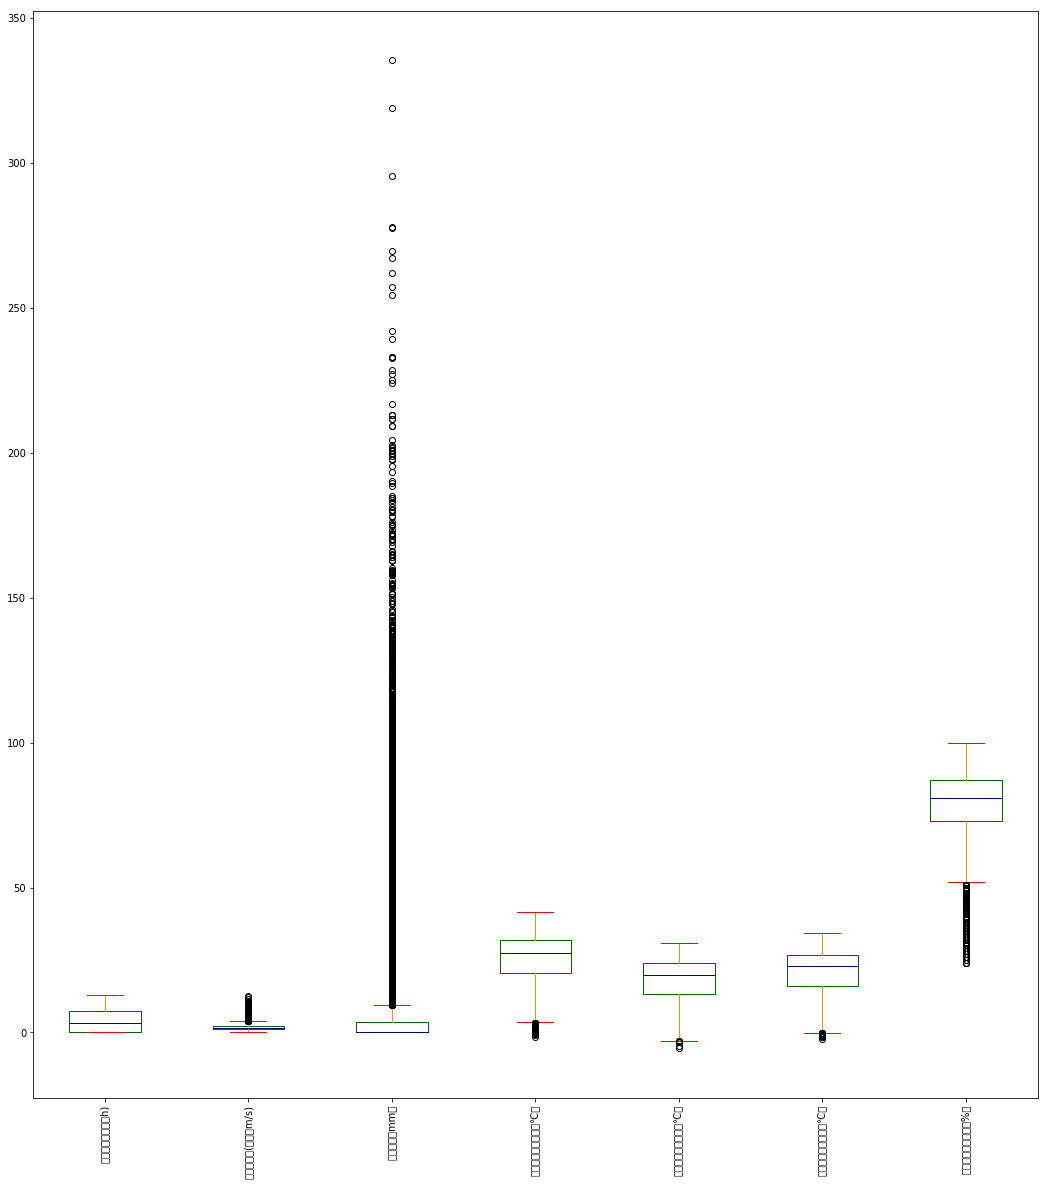

In [262]:
#plt.figure(figsize=(18,20))
color = dict(boxes='DarkGreen', whiskers='DarkOrange',medians='DarkBlue', caps='Red')
 
#train_weather.plot(kind='box',subplots=True,title='Different boxplots',color=color,sym='r+')
train_weather[['日照时数（单位：h)','日平均风速(单位：m/s)','日降水量（mm）','日最高温度（单位：℃）','日最低温度（单位：℃）',
               '日平均温度（单位：℃）','日相对湿度（单位：%）']].plot(kind='box',color=color,figsize=(18,20))
plt.xticks(rotation=90)

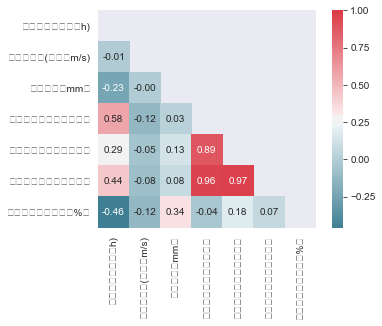

In [276]:
import seaborn as sns
sns.set_style("dark")

plt.figure(figsize = (6,4))
#colnm = train_weather.columns.tolist()[:11]
colnm = ['日照时数（单位：h)','日平均风速(单位：m/s)','日降水量（mm）','日最高温度（单位：℃）','日最低温度（单位：℃）',
         '日平均温度（单位：℃）','日相对湿度（单位：%）']
mcorr = train_weather[colnm].corr()
mask = np.zeros_like(mcorr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)
g = sns.heatmap(mcorr, mask=mask, cmap=cmap, square=True, annot=True, fmt='0.2f')

In [253]:
train_weather

,Unnamed: 0,Unnamed: 0.1,区县id,站名id,年份,月份,日期,日照时数（单位：h),02时风向,08时风向,14时风向,20时风向,日平均风速(单位：m/s),日降水量（mm）,日最高温度（单位：℃）,日最低温度（单位：℃）,日平均温度（单位：℃）,日相对湿度（单位：%）,日平均气压（单位：hPa）
0,0,0,county25,1,2015,1,1,6.3,NNW,N,NNE,S,1.8,0.000000,14.1,7.2,9.1,43.0,980.6
1,1,1,county25,1,2015,1,2,8.1,SSE,S,SSW,S,1.3,0.000000,18.3,1.6,7.5,64.0,977.7
2,2,2,county25,1,2015,1,3,4.3,S,SSE,S,SSE,2.0,0.000000,18.9,2.4,9.4,66.0,973.1
3,3,3,county25,1,2015,1,4,0.0,WNW,SSW,S,SSE,2.2,0.300000,14.9,9.0,11.5,76.0,966.7
4,4,4,county25,1,2015,1,5,0.0,SSE,S,SSW,C,2.8,0.800000,16.8,11.6,15.5,91.0,963.9
5,5,5,county25,1,2015,1,6,0.0,NNW,N,N,NNE,3.1,1.800000,15.5,7.0,9.4,85.0,972.0
6,6,6,county25,1,2015,1,7,0.0,N,N,NNW,N,3.3,2.200000,8.0,5.3,6.5,82.0,978.4
7,7,7,county25,1,2015,1,8,0.0,C,ESE,N,N,1.4,4.066667,9.3,4.0,6.6,80.0,981.1
8,8,8,county25,1,2015,1,9,0.0,N,NNE,N,SSE,1.6,3.500000,9.0,5.9,7.3,78.0,980.6
9,9,9,county25,1,2015,1,10,0.0,NNE,NW,N,E,1.1,15.800000,9.1,5.5,7.0,87.0,979.3


划分早晚稻

In [15]:
earlyrice=train_weather[[x in [3,4,5,6,7] for x in list(train_weather['月份'])]]
laterice=train_weather[[x in [6,7,8,9,10] for x in list(train_weather['月份'])]]

In [16]:
earlyrice['月份'].value_counts()

7    11284
5    11284
3    11284
6    10920
4    10920
Name: 月份, dtype: int64

每个地区每年每一周数据取均值作为训练数据

In [17]:
from itertools import product
X_earlyrice=pd.DataFrame(columns=['区县id','年份','日照时数（单位：h)','日平均风速(单位：m/s)','日降水量（mm）','日最高温度（单位：℃）',
                        '日最低温度（单位：℃）','日平均温度（单位：℃）','日相对湿度（单位：%）','日平均气压（单位：hPa）'])
X_laterice=pd.DataFrame(columns=['区县id','年份','日照时数（单位：h)','日平均风速(单位：m/s)','日降水量（mm）','日最高温度（单位：℃）',
                        '日最低温度（单位：℃）','日平均温度（单位：℃）','日相对湿度（单位：%）','日平均气压（单位：hPa）'])

for qxid,year in list(product(list(set(list(earlyrice['区县id']))),list(set(list(earlyrice['年份']))))):
    curr=earlyrice[earlyrice['区县id']==qxid][earlyrice['年份']==year]
    n=len(curr.index)//7*7
    if n!=147:
        n=147
        curr=curr[['月份','日期','日照时数（单位：h)','日平均风速(单位：m/s)','日降水量（mm）','日最高温度（单位：℃）','日最低温度（单位：℃）',
                   '日平均温度（单位：℃）','日相对湿度（单位：%）','日平均气压（单位：hPa）']].astype(float).groupby(['月份','日期']).mean()
    x_new=curr[:n][['日照时数（单位：h)','日平均风速(单位：m/s)','日降水量（mm）','日最高温度（单位：℃）','日最低温度（单位：℃）',
                '日平均温度（单位：℃）','日相对湿度（单位：%）','日平均气压（单位：hPa）']].astype(float).groupby(np.arange(len(curr.index)//7*7)//7, axis=0).mean()
    x_new['年份']=year
    x_new['区县id']=qxid
    X_earlyrice=X_earlyrice.append(x_new,ignore_index=True)
    
for qxid,year in list(product(list(set(list(laterice['区县id']))),list(set(list(laterice['年份']))))):
    curr=laterice[laterice['区县id']==qxid][laterice['年份']==year]
    n=len(curr.index)//7*7
    if n!=147:
        n=147
        curr=curr[['月份','日期','日照时数（单位：h)','日平均风速(单位：m/s)','日降水量（mm）','日最高温度（单位：℃）',
                   '日最低温度（单位：℃）','日平均温度（单位：℃）','日相对湿度（单位：%）','日平均气压（单位：hPa）']].astype(float).groupby(['月份','日期']).mean()
    x_new=curr[:n][['日照时数（单位：h)','日平均风速(单位：m/s)','日降水量（mm）','日最高温度（单位：℃）','日最低温度（单位：℃）',
                '日平均温度（单位：℃）','日相对湿度（单位：%）','日平均气压（单位：hPa）']].astype(float).groupby(np.arange(len(curr.index)//7*7)//7, axis=0).mean()
    x_new['年份']=year
    x_new['区县id']=qxid
    X_laterice=X_laterice.append(x_new,ignore_index=True)

c:\programdata\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
c:\programdata\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)
c:\programdata\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [18]:
X_earlyrice

,区县id,年份,日平均气压（单位：hPa）,日平均温度（单位：℃）,日平均风速(单位：m/s),日最低温度（单位：℃）,日最高温度（单位：℃）,日照时数（单位：h),日相对湿度（单位：%）,日降水量（mm）
0,county75,2016,996.785714,18.971429,1.785714,16.371429,22.314286,2.428571,76.142857,0.216667
1,county75,2016,996.557143,14.842857,3.485714,12.342857,18.671429,1.971429,68.857143,0.292857
2,county75,2016,991.042857,18.342857,1.828571,16.700000,20.928571,0.028571,89.571429,1.433333
3,county75,2016,1000.271429,16.357143,2.842857,14.314286,20.042857,2.028571,73.428571,1.940476
4,county75,2016,993.500000,19.957143,1.600000,18.300000,22.100000,0.700000,89.714286,1.785714
5,county75,2016,988.714286,24.371429,3.171429,21.542857,27.857143,2.385714,76.571429,5.028571
6,county75,2016,986.914286,25.557143,2.700000,21.814286,30.342857,4.700000,72.714286,5.497619
7,county75,2016,989.071429,22.128571,2.385714,20.428571,24.685714,0.457143,83.857143,11.614286
8,county75,2016,989.685714,23.428571,2.600000,20.842857,27.357143,2.871429,81.142857,2.294841
9,county75,2016,986.628571,28.242857,2.728571,25.357143,31.814286,3.028571,76.000000,1.787632


In [19]:
X_laterice

,区县id,年份,日平均气压（单位：hPa）,日平均温度（单位：℃）,日平均风速(单位：m/s),日最低温度（单位：℃）,日最高温度（单位：℃）,日照时数（单位：h),日相对湿度（单位：%）,日降水量（mm）
0,county75,2016,985.714286,29.042857,2.100000,26.071429,33.185714,7.728571,77.428571,6.728571
1,county75,2016,984.042857,27.042857,1.785714,24.785714,31.857143,3.885714,87.714286,40.321429
2,county75,2016,986.300000,27.428571,2.714286,24.171429,31.971429,4.242857,78.571429,10.826190
3,county75,2016,987.157143,30.342857,2.514286,27.042857,34.457143,10.071429,70.000000,0.000000
4,county75,2016,985.057143,27.614286,1.885714,25.857143,31.357143,1.814286,85.000000,24.642857
5,county75,2016,983.285714,29.557143,1.985714,25.700000,34.985714,8.928571,76.714286,12.116667
6,county75,2016,984.042857,29.528571,3.114286,27.042857,33.271429,5.600000,77.285714,5.321429
7,county75,2016,987.228571,30.400000,2.557143,27.142857,34.828571,8.514286,69.857143,0.871429
8,county75,2016,985.957143,30.285714,2.100000,26.314286,35.971429,8.571429,67.714286,2.585714
9,county75,2016,984.071429,28.857143,1.828571,25.471429,33.428571,7.657143,78.714286,12.385714


## 划分验证集，测试集，训练集

In [20]:
X_earlyrice_val=X_earlyrice[X_earlyrice['年份']==2018]
X_laterice_val=X_laterice[X_laterice['年份']==2018]

In [32]:
X_earlyrice_val

,区县id,年份,日平均气压（单位：hPa）,日平均温度（单位：℃）,日平均风速(单位：m/s),日最低温度（单位：℃）,日最高温度（单位：℃）,日照时数（单位：h),日相对湿度（单位：%）,日降水量（mm）
42,county75,2018,989.928571,21.614286,2.842857,18.771429,26.157143,2.614286,76.857143,2.342857
43,county75,2018,998.528571,17.471429,2.200000,14.585714,21.642857,3.871429,69.285714,0.757143
44,county75,2018,993.614286,20.328571,3.057143,17.742857,23.828571,2.542857,75.285714,1.024571
45,county75,2018,996.828571,19.085714,1.557143,16.800000,22.157143,0.900000,80.428571,10.909810
46,county75,2018,992.614286,23.185714,1.642857,20.042857,27.642857,3.671429,78.857143,6.928571
47,county75,2018,996.257143,19.514286,2.814286,16.414286,23.771429,2.957143,69.571429,0.478571
48,county75,2018,992.842857,22.400000,2.528571,18.300000,27.000000,5.185714,68.714286,1.014286
49,county75,2018,989.557143,23.714286,2.885714,22.014286,26.357143,0.257143,81.571429,8.101429
50,county75,2018,992.742857,24.114286,2.157143,21.542857,27.657143,2.085714,83.428571,6.133333
51,county75,2018,990.171429,24.785714,2.728571,23.471429,27.957143,1.442857,86.285714,6.840476


In [23]:
from sklearn.model_selection import train_test_split

#index_earlyrice_train,index_earlyrice_test=train_test_split(list(product(list(set(list(X_earlyrice['区县id']))),[2015,2016,2017])),random_state=42)
#index_laterice_train,index_laterice_test=train_test_split(list(product(list(set(list(X_laterice['区县id']))),[2015,2016,2017])),random_state=42)
index_earlyrice_train,index_earlyrice_test=train_test_split(list(product(list(set(list(train_rice['区县id']))),[2015,2016,2017])),random_state=42)
index_laterice_train,index_laterice_test=train_test_split(list(product(list(set(list(train_rice['区县id']))),[2015,2016,2017])),random_state=42)

X_earlyrice_train=pd.DataFrame(columns=['区县id','年份','日照时数（单位：h)','日平均风速(单位：m/s)','日降水量（mm）','日最高温度（单位：℃）',
                        '日最低温度（单位：℃）','日平均温度（单位：℃）','日相对湿度（单位：%）','日平均气压（单位：hPa）'])
X_laterice_train=pd.DataFrame(columns=['区县id','年份','日照时数（单位：h)','日平均风速(单位：m/s)','日降水量（mm）','日最高温度（单位：℃）',
                        '日最低温度（单位：℃）','日平均温度（单位：℃）','日相对湿度（单位：%）','日平均气压（单位：hPa）'])
X_earlyrice_test=pd.DataFrame(columns=['区县id','年份','日照时数（单位：h)','日平均风速(单位：m/s)','日降水量（mm）','日最高温度（单位：℃）',
                        '日最低温度（单位：℃）','日平均温度（单位：℃）','日相对湿度（单位：%）','日平均气压（单位：hPa）'])
X_laterice_test=pd.DataFrame(columns=['区县id','年份','日照时数（单位：h)','日平均风速(单位：m/s)','日降水量（mm）','日最高温度（单位：℃）',
                        '日最低温度（单位：℃）','日平均温度（单位：℃）','日相对湿度（单位：%）','日平均气压（单位：hPa）'])
y_earlyrice_train=[]
y_laterice_train=[]
y_earlyrice_test=[]
y_laterice_test=[]
for index in index_earlyrice_train:
    qxid,year=index[0],index[1]
    curr=X_earlyrice[X_earlyrice['区县id']==qxid][X_earlyrice['年份']==year]
    X_earlyrice_train=X_earlyrice_train.append(curr,ignore_index=True)
    y=float(train_rice[train_rice['区县id']==qxid][str(year)+'年早稻'].values)
    y_earlyrice_train.append(y)
for index in index_earlyrice_test:
    qxid,year=index[0],index[1]
    curr=X_earlyrice[X_earlyrice['区县id']==qxid][X_earlyrice['年份']==year]
    X_earlyrice_test=X_earlyrice_test.append(curr,ignore_index=True)
    y=float(train_rice[train_rice['区县id']==qxid][str(year)+'年早稻'].values)
    y_earlyrice_test.append(y)
for index in index_laterice_train:
    qxid,year=index[0],index[1]
    curr=X_laterice[X_laterice['区县id']==qxid][X_laterice['年份']==year]
    X_laterice_train=X_laterice_train.append(curr,ignore_index=True)
    y=float(train_rice[train_rice['区县id']==qxid][str(year)+'年早稻'].values)
    y_laterice_train.append(y)
for index in index_laterice_test:
    qxid,year=index[0],index[1]
    curr=X_laterice[X_laterice['区县id']==qxid][X_laterice['年份']==year]
    X_laterice_test=X_laterice_test.append(curr,ignore_index=True)
    y=float(train_rice[train_rice['区县id']==qxid][str(year)+'年早稻'].values)
    y_laterice_test.append(y)

c:\programdata\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
c:\programdata\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)
c:\programdata\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
c:\programdata\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
c:\programdata\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:40: UserWarning: Boolean Series key will be reindexed to match DataFrame inde

In [24]:
print(len(y_earlyrice_train))
print(len(index_earlyrice_train))
print(len(set([tuple(x) for x in [list(x) for x in X_earlyrice_train[['区县id','年份']].values]])))

182
182
182


In [25]:
len(set([x[0] for x in index_earlyrice_train]))

80

In [26]:
len(set([x[0] for x in index_earlyrice_test]))

47

In [27]:
X_earlyrice_train

,区县id,年份,日平均气压（单位：hPa）,日平均温度（单位：℃）,日平均风速(单位：m/s),日最低温度（单位：℃）,日最高温度（单位：℃）,日照时数（单位：h),日相对湿度（单位：%）,日降水量（mm）
0,county80,2016,1009.057143,19.342857,1.685714,15.828571,24.200000,3.571429,77.000000,0.156250
1,county80,2016,1009.200000,13.728571,2.142857,11.228571,16.742857,1.042857,76.285714,0.556786
2,county80,2016,1003.257143,18.657143,1.114286,16.857143,20.985714,0.171429,91.285714,1.366667
3,county80,2016,1012.157143,16.142857,1.528571,13.400000,19.828571,2.614286,77.714286,3.442857
4,county80,2016,1005.628571,21.857143,2.014286,19.371429,24.971429,1.357143,80.000000,0.020000
5,county80,2016,1000.785714,24.657143,2.328571,21.857143,28.300000,4.114286,79.000000,2.328571
6,county80,2016,998.757143,24.971429,2.385714,20.714286,29.428571,4.614286,79.857143,5.645238
7,county80,2016,1001.042857,23.114286,1.971429,20.457143,26.157143,1.514286,85.857143,16.230952
8,county80,2016,1001.357143,23.842857,1.600000,20.914286,28.185714,3.414286,80.857143,2.014286
9,county80,2016,998.914286,27.842857,2.857143,25.200000,31.671429,4.771429,78.000000,2.059429


归一化

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

Xe_train=scaler.fit_transform(X_earlyrice_train[['日照时数（单位：h)','日平均风速(单位：m/s)','日降水量（mm）','日最高温度（单位：℃）',
                '日最低温度（单位：℃）','日平均温度（单位：℃）','日相对湿度（单位：%）','日平均气压（单位：hPa）']].values)
Xl_train=scaler.fit_transform(X_laterice_train[['日照时数（单位：h)','日平均风速(单位：m/s)','日降水量（mm）','日最高温度（单位：℃）',
                '日最低温度（单位：℃）','日平均温度（单位：℃）','日相对湿度（单位：%）','日平均气压（单位：hPa）']].values)
Xe_test=scaler.fit_transform(X_earlyrice_test[['日照时数（单位：h)','日平均风速(单位：m/s)','日降水量（mm）','日最高温度（单位：℃）',
                '日最低温度（单位：℃）','日平均温度（单位：℃）','日相对湿度（单位：%）','日平均气压（单位：hPa）']].values)
Xl_test=scaler.fit_transform(X_laterice_test[['日照时数（单位：h)','日平均风速(单位：m/s)','日降水量（mm）','日最高温度（单位：℃）',
                '日最低温度（单位：℃）','日平均温度（单位：℃）','日相对湿度（单位：%）','日平均气压（单位：hPa）']].values)
Xe_train=Xe_train.reshape(-1,21,8)
Xl_train=Xl_train.reshape(-1,21,8)
Xe_test=Xe_test.reshape(-1,21,8)
Xl_test=Xl_test.reshape(-1,21,8)
ye_train=np.array(y_earlyrice_train)
yl_train=np.array(y_laterice_train)
ye_test=np.array(y_earlyrice_test)
yl_test=np.array(y_laterice_test)

In [29]:
ye_train.shape

(182,)

## LSTM训练

In [30]:
def make_batches(X,y,batch_size,n_steps):
    np.random.seed(2)
    batches=[]

    m=len(y)
    
    permutation = list(np.random.permutation(m)) 
    shuffled_X=X[permutation,:,:]
    shuffled_y=y[permutation]

    num_batch_size=m//batch_size
    for k in range(num_batch_size):
        batch_X=shuffled_X[k*batch_size:(k+1)*batch_size,:,:]
        batch_y=shuffled_y[k*batch_size:(k+1)*batch_size]
        batch=(batch_X,batch_y)
        batches.append(batch)
        
    if m%batch_size!=0:
        batch_X=shuffled_X[num_batch_size*batch_size:,:,:]
        batch_y=shuffled_y[num_batch_size*batch_size:]
        batch=(batch_X,batch_y)
        batches.append(batch)
        
    return batches

In [47]:
tf.reset_default_graph()

n_steps=21
n_inputs=8
n_outputs=1
n_neurons=100

n_iterations = 1200
learning_rate=0.01
batch_size=8

X=tf.placeholder(tf.float32,[None,n_steps,n_inputs])
y=tf.placeholder(tf.float32,[None])

basic_cell=tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)
outputs,states=tf.nn.dynamic_rnn(basic_cell,X,dtype=tf.float32)

y_pre=tf.layers.dense(states,n_outputs)
loss=tf.reduce_mean(tf.square(y - y_pre), name = 'loss')
optimizer=tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op=optimizer.minimize(loss)

init=tf.global_variables_initializer()
saver=tf.train.Saver()

batches=make_batches(Xe_train,ye_train,batch_size,n_steps)

with tf.Session() as sess:
    init.run()
    for iterations in range(n_iterations):
        for batch in batches:
            X_batch,y_batch=batch[0],batch[1]
            sess.run(training_op,feed_dict={X:X_batch,y:y_batch})
        if iterations%100==0:
            test_loss=sess.run(loss,feed_dict={X:Xe_test,y:ye_test})
            train_loss=sess.run(loss,feed_dict={X:X_batch,y:y_batch})
            print("After %d training steps,Train loss is %g,Test loss is %g"%(iterations,train_loss,test_loss))
    saver.save(sess, "./Rice_yield_prediction_LSTM_model")

After 0 training steps,Train loss is 11.9776,Test loss is 15.6692
After 100 training steps,Train loss is 1.67771,Test loss is 3.26936
After 200 training steps,Train loss is 2.22735,Test loss is 3.89665
After 300 training steps,Train loss is 2.23591,Test loss is 3.99497
After 400 training steps,Train loss is 2.00237,Test loss is 6.64886
After 500 training steps,Train loss is 2.35189,Test loss is 3.98014
After 600 training steps,Train loss is 2.27692,Test loss is 4.02071
After 700 training steps,Train loss is 2.32739,Test loss is 4.05472
After 800 training steps,Train loss is 2.37897,Test loss is 3.82516
After 900 training steps,Train loss is 2.31772,Test loss is 3.6985
After 1000 training steps,Train loss is 2.20244,Test loss is 3.78682
After 1100 training steps,Train loss is 2.11741,Test loss is 3.80541


In [48]:
with tf.Session() as sess:
    saver.restore(sess,"./Rice_yield_prediction_LSTM_model")

    ye_train_pre=sess.run(y_pre,feed_dict={X:Xe_train})
    ye_test_pre=sess.run(y_pre,feed_dict={X:Xe_test})
print(ye_train_pre,'\n',ye_test_pre)

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from ./Rice_yield_prediction_LSTM_model
[[14.393351 ]
 [14.092165 ]
 [14.092165 ]
 [14.08658  ]
 [14.092163 ]
 [14.092165 ]
 [14.092585 ]
 [14.092165 ]
 [14.092155 ]
 [14.097496 ]
 [14.404713 ]
 [14.396616 ]
 [14.092165 ]
 [14.092165 ]
 [14.092165 ]
 [14.404671 ]
 [14.092173 ]
 [14.093506 ]
 [14.378824 ]
 [14.092165 ]
 [14.092165 ]
 [14.092134 ]
 [14.092165 ]
 [14.092251 ]
 [14.723843 ]
 [14.405052 ]
 [14.092165 ]
 [14.092165 ]
 [14.40486  ]
 [14.092165 ]
 [14.092165 ]
 [14.092165 ]
 [14.09252  ]
 [14.092163 ]
 [14.092165 ]
 [14.092163 ]
 [14.40489  ]
 [14.404072 ]
 [14.092163 ]
 [14.092165 ]
 [13.178249 ]
 [14.092165 ]
 [14.09794  ]
 [14.092165 ]
 [14.723761 ]
 [14.092165 ]
 [14.092165 ]
 [14.40403  ]
 [14.092165 ]
 [14.092165 ]
 [14.092165 ]
 [14.403711 ]
 [14.404041 ]
 [14.092165 ]
 [14.145241 ]
 [14.092169 ]
 [14.092165 ]
 [14.411903 ]
 [14.438217 ]
 [14.09216

In [49]:
scaler = StandardScaler()

Xe_val=scaler.fit_transform(X_earlyrice_val[['日照时数（单位：h)','日平均风速(单位：m/s)','日降水量（mm）','日最高温度（单位：℃）',
                '日最低温度（单位：℃）','日平均温度（单位：℃）','日相对湿度（单位：%）','日平均气压（单位：hPa）']].values)
Xl_val=scaler.fit_transform(X_laterice_val[['日照时数（单位：h)','日平均风速(单位：m/s)','日降水量（mm）','日最高温度（单位：℃）',
                '日最低温度（单位：℃）','日平均温度（单位：℃）','日相对湿度（单位：%）','日平均气压（单位：hPa）']].values)

Xe_val=Xe_val.reshape(-1,21,8)
Xl_val=Xl_val.reshape(-1,21,8)

with tf.Session() as sess:
    saver.restore(sess,"./Rice_yield_prediction_LSTM_model")

    ye_val_pre=sess.run(y_pre,feed_dict={X:Xe_val})


INFO:tensorflow:Restoring parameters from ./Rice_yield_prediction_LSTM_model


In [89]:
cc=list(X_earlyrice_val['区县id'])
new_cc=list(set(cc))
new_cc.sort(key=cc.index)
y_i_list=list(zip(ye_val_pre,index_cc))
def takenum(elem):
    return elem[1]
y_i_list.sort(key=takenum)

In [121]:
df=pd.DataFrame(ye)
testA['ye']=df
testA.to_csv('testA.csv',index =False,header=False)

In [112]:
testA_j=pd.read_csv('testA.csv')
testA_j

,county1
0,county2
1,county3
2,county4
3,county5
4,county6
5,county7
6,county8
7,county9
8,county10
9,county11


## XGB回归

早晚稻不分

In [199]:
train_weather_mean=train_weather.groupby(['区县id','年份'])[['日照时数（单位：h)','日平均风速(单位：m/s)','日降水量（mm）','日最高温度（单位：℃）','日最低温度（单位：℃）',
                '日平均温度（单位：℃）','日相对湿度（单位：%）','日平均气压（单位：hPa）']].mean()
train_weather_mean.to_csv('train_weather_mean.csv')
train_weather_mean=pd.read_csv('train_weather_mean.csv')
train_weather_mean

In [ ]:
X_val=train_weather_mean.loc[train_weather_mean['年份']==2018]
X_train_test=train_weather_mean.loc[train_weather_mean['年份']!=2018][['区县id','年份','日照时数（单位：h)','日平均风速(单位：m/s)','日降水量（mm）',
                '日平均温度（单位：℃）','日相对湿度（单位：%）','日平均气压（单位：hPa）']]
train_index=[x in list(train_rice['区县id']) for x in list(X_train_test['区县id'])]
X_train_test=X_train_test[train_index]

y_train_test_e=[]
y_train_test_l=[]
qxid=list(X_train_test['区县id'])
year=list(X_train_test['年份'])
for qxid,year in zip(qxid,year):
    y=float(train_rice[train_rice['区县id']==qxid][str(year)+'年早稻'].values)
    y_train_test_e.append(y)
    y=float(train_rice[train_rice['区县id']==qxid][str(year)+'年晚稻'].values)
    y_train_test_l.append(y)

分早晚稻

In [296]:
earlyrice_mean=earlyrice.groupby(['区县id','年份'])[['日照时数（单位：h)','日平均风速(单位：m/s)','日降水量（mm）','日最高温度（单位：℃）','日最低温度（单位：℃）',
                '日平均温度（单位：℃）','日相对湿度（单位：%）','日平均气压（单位：hPa）']].mean()
earlyrice_mean.to_csv('earlyrice_mean.csv')
earlyrice_mean=pd.read_csv('earlyrice_mean.csv')

X_val=earlyrice_mean.loc[earlyrice_mean['年份']==2018]
X_train_test=earlyrice_mean.loc[earlyrice_mean['年份']!=2018][['区县id','年份','日照时数（单位：h)','日平均风速(单位：m/s)','日降水量（mm）',
                '日平均温度（单位：℃）','日相对湿度（单位：%）','日平均气压（单位：hPa）']]
train_index=[x in list(train_rice['区县id']) for x in list(X_train_test['区县id'])]
X_train_test=X_train_test[train_index]

y_train_test_e=[]
y_train_test_l=[]
qxid=list(X_train_test['区县id'])
year=list(X_train_test['年份'])
for qxid,year in zip(qxid,year):
    y=float(train_rice[train_rice['区县id']==qxid][str(year)+'年早稻'].values)
    y_train_test_e.append(y)
    y=float(train_rice[train_rice['区县id']==qxid][str(year)+'年晚稻'].values)
    y_train_test_l.append(y)

归一化

In [297]:
scaler = StandardScaler()

X_train_test=scaler.fit_transform(X_train_test[['日照时数（单位：h)','日平均风速(单位：m/s)','日降水量（mm）',
                                                '日平均温度（单位：℃）','日相对湿度（单位：%）','日平均气压（单位：hPa）']].values)

划分

In [298]:
X_train,X_test,ye_train,ye_test,yl_train,yl_test=train_test_split(X_train_test,y_train_test_e,y_train_test_l,random_state=42)

### xgb回归

In [288]:
import xgboost as xgb
import time

xgb_reg = xgb.XGBRegressor(learning_rate=0.01, n_estimators=500, 
                            max_depth=7, subsample=0.6, colsample_bytree=0.6)
t1=time.time()
xgb_reg.fit(X_train,ye_train)
t2=time.time()

print("XGBClassifier训练集精度:", xgb_reg.score(X_train,ye_train))
print("XGBClassifier测试集精度:", xgb_reg.score(X_test,ye_test))
print("耗时：",(t2-t1))

[16:52:46] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBClassifier训练集精度: 0.9213590046587722
XGBClassifier测试集精度: 0.3364169756867875
耗时： 0.08377432823181152


In [289]:
from sklearn.metrics import mean_squared_error
ye_train_pre=xgb_reg.predict(X_train)
ye_test_pre=xgb_reg.predict(X_test)
mse_train=mean_squared_error(ye_train,ye_train_pre)
mse_test=mean_squared_error(ye_test,ye_test_pre)
print('训练集mse:',mse_train,'\n验证集mse:',mse_test)

训练集mse: 0.256805111345643 
验证集mse: 4.087151410626359


网格搜索

In [302]:
from sklearn.model_selection import GridSearchCV
cv_params = {'n_estimators': [400, 500, 600, 700, 800]}
other_params = {'learning_rate': 0.1, 'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 1, 'seed': 0,
                'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 1}

model = xgb.XGBRegressor(**other_params)
optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=4)
optimized_GBM.fit(X_train, ye_train)
means = optimized_GBM.cv_results_['mean_test_score']
params = optimized_GBM.cv_results_['params']
print('每轮迭代运行结果:{},{}'.format(params,means))
print('参数的最佳取值：{0}'.format(optimized_GBM.best_params_))
print('最佳模型得分:{0}'.format(optimized_GBM.best_score_))

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


[17:05:10] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
每轮迭代运行结果:[{'n_estimators': 400}, {'n_estimators': 500}, {'n_estimators': 600}, {'n_estimators': 700}, {'n_estimators': 800}],[-2.84973762 -2.84979942 -2.8497863  -2.84979515 -2.84979878]
参数的最佳取值：{'n_estimators': 400}
最佳模型得分:-2.849737622484569


[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed:    7.6s finished
c:\programdata\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [ ]:
cv_params = {'max_depth': [3, 4, 5, 6, 7, 8, 9, 10], 'min_child_weight': [1, 2, 3, 4, 5, 6]}

In [ ]:
cv_params = {'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]}

In [ ]:
cv_params = {'subsample': [0.6, 0.7, 0.8, 0.9], 'colsample_bytree': [0.6, 0.7, 0.8, 0.9]}

In [ ]:
cv_params = {'reg_alpha': [0.05, 0.1, 1, 2, 3], 'reg_lambda': [0.05, 0.1, 1, 2, 3]}

In [ ]:
cv_params = {'learning_rate': [0.01, 0.05, 0.07, 0.1, 0.2]}

In [303]:
ye_train_pre=optimized_GBM.predict(X_train)
ye_test_pre=optimized_GBM.predict(X_test)
mse_train=mean_squared_error(ye_train,ye_train_pre)
mse_test=mean_squared_error(ye_test,ye_test_pre)
print('训练集mse:',mse_train,'\n验证集mse:',mse_test)

训练集mse: 1.8718233042768227e-06 
验证集mse: 4.0766171570257255


In [304]:
ye_test_pre

array([15.245249 , 16.192396 , 12.219191 , 14.8283205, 13.971405 ,
       14.9375   , 16.76186  , 12.509784 , 15.551216 , 16.35165  ,
       14.288594 , 15.288436 , 15.05843  , 12.922259 , 14.747716 ,
       10.472104 , 14.455796 , 15.176074 , 15.507451 , 14.269921 ,
       14.702715 , 14.749272 , 16.274624 , 14.68196  , 14.560435 ,
       13.773032 , 15.995097 , 15.0941925, 15.2891655, 15.848009 ,
       16.57673  , 13.302406 , 13.868685 , 14.666784 , 15.403841 ,
       15.428583 , 15.930264 , 15.7201   , 11.517688 , 14.867634 ,
       11.078917 , 15.154287 , 15.93222  , 15.120356 , 15.404    ,
       14.903168 , 16.365974 , 16.23857  , 16.7859   , 15.952177 ,
       15.608652 , 14.279114 , 14.340348 , 13.6719   , 15.286607 ,
       12.881057 , 11.855658 , 14.293024 , 16.136412 , 15.555148 ,
       14.997099 ], dtype=float32)

In [293]:
ye_test

[15.37534087,
 16.14390551,
 10.86527704,
 15.06273636,
 13.12709155,
 15.49364533,
 15.6240649,
 10.64808789,
 15.29571944,
 17.86578177,
 15.72537212,
 16.30267141,
 14.75765721,
 15.53934907,
 11.095608,
 12.05053911,
 14.77323607,
 12.74275363,
 16.6851052,
 15.9437959,
 16.65800809,
 9.600024386,
 17.14063638,
 15.66898384,
 12.91277522,
 8.125671763,
 15.18661917,
 16.45336598,
 15.35206102,
 17.31983897,
 17.87700518,
 13.93127954,
 15.19159635,
 15.20632569,
 9.317050764,
 15.94274907,
 15.26625619,
 13.98947078,
 15.0612733,
 15.97989293,
 7.106327379,
 16.50279126,
 17.93043515,
 12.48419605,
 13.93782988,
 16.66347889,
 15.97978042,
 16.97467259,
 17.30532603,
 15.41318859,
 16.35549168,
 13.70459967,
 14.400593300000002,
 14.91973113,
 14.35150038,
 14.69724398,
 7.7442956689999995,
 13.73936293,
 14.2511214,
 13.411462,
 17.34630388]

In [305]:
ye_train_pre

array([15.050702 , 14.707344 , 13.140236 , 16.645754 , 16.46421  ,
       14.626686 , 17.305458 , 13.325798 , 16.507713 , 17.174234 ,
       13.23556  , 15.903956 , 16.707115 , 16.800356 , 15.34931  ,
       16.030582 , 16.231564 , 14.334481 , 17.373383 , 10.637262 ,
       14.787087 , 15.186631 , 15.744079 , 14.633985 , 13.237895 ,
       15.588023 , 14.968252 , 16.553808 , 16.86237  , 15.783495 ,
       16.997936 , 17.284237 , 15.5015135, 15.831262 , 15.237095 ,
       15.119967 , 13.33623  ,  7.2743177, 15.328482 , 13.969109 ,
       10.997632 , 15.894709 , 14.670958 , 15.056472 , 14.768066 ,
       12.168395 , 17.210615 , 15.767422 , 15.812525 , 15.836132 ,
        7.335527 , 15.648749 , 17.070707 , 14.985264 , 13.309436 ,
       15.8980255, 12.829912 , 14.745806 , 14.635238 , 12.727303 ,
       14.987575 , 17.168934 , 14.702573 , 15.084914 , 13.551783 ,
       16.510834 , 13.821269 , 15.128036 , 15.122559 , 12.698607 ,
       16.760946 , 14.363265 , 16.293058 , 16.731304 , 15.3698

In [295]:
ye_train

[15.05125483,
 14.70731545,
 13.1385614,
 16.64839115,
 16.4645708,
 14.625446300000002,
 17.3060965,
 13.32399063,
 16.50689531,
 17.17390869,
 13.23569416,
 15.90614581,
 16.70878335,
 16.79748447,
 15.34860368,
 16.03255138,
 16.23147865,
 14.33425024,
 17.37483759,
 10.63659743,
 14.7871149,
 15.18588977,
 15.74519084,
 14.62933385,
 13.23802998,
 15.58780212,
 14.96704564,
 16.55591589,
 16.8632204,
 15.782056299999999,
 16.999289,
 17.28472986,
 15.50292222,
 15.83190742,
 15.23660435,
 15.11900554,
 13.33589694,
 7.274634402999999,
 15.32780523,
 13.96784857,
 10.99888655,
 15.89347953,
 14.67006865,
 15.05716043,
 14.76740341,
 12.16854677,
 17.20929124,
 15.76707049,
 15.81258922,
 15.83568061,
 7.334943631,
 15.64959104,
 17.07134284,
 14.98469259,
 13.30891918,
 15.89878629,
 12.82986343,
 14.74642509,
 14.63465622,
 12.72483356,
 14.98566719,
 17.16976375,
 14.70039149,
 15.08539279,
 13.54872319,
 16.51383367,
 13.82225513,
 15.12745152,
 15.12088544,
 12.69772995,
 16.762

In [ ]:
qx_val=list(X_val['区县id'])
X_val=scaler.fit_transform(X_val[['日照时数（单位：h)','日平均风速(单位：m/s)','日降水量（mm）','日最高温度（单位：℃）',
                '日最低温度（单位：℃）','日平均温度（单位：℃）','日相对湿度（单位：%）','日平均气压（单位：hPa）']].values)


In [ ]:
qx_val=list(X_val['区县id'])
new_qx_val=list(set(qx_val))
new_qx_val.sort(key=qx_val.index)
y_i_list=list(zip(ye_val_pre,index_cc))
def takenum(elem):
    return elem[1]
y_i_list.sort(key=takenum)
df=pd.DataFrame(ye)
testA['ye']=df
testA.to_csv('testA.csv',index =False,header=False)